In [2820]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics

### About the dataset

This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off or in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

### Loading the dataset

In [2821]:
loan_df = pd.read_csv('loan_train.csv')
loan_df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### Exploratory Data Analysis and preprocessing

In [2822]:
loan_df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [2823]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [2824]:
test_df = pd.read_csv('loan_test.csv')
test_df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [2825]:
test_df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,182.407407,182.407407,914.814815,21.888889,31.833333
std,116.220759,116.220759,174.190751,8.818220,5.992920
min,1.000000,1.000000,300.000000,7.000000,20.000000
25%,79.500000,79.500000,800.000000,15.000000,28.000000
50%,174.000000,174.000000,1000.000000,30.000000,30.500000
75%,300.250000,300.250000,1000.000000,30.000000,36.000000
max,396.000000,396.000000,1000.000000,30.000000,50.000000


In [2826]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      54 non-null     int64 
 1   Unnamed: 0.1    54 non-null     int64 
 2   loan_status     54 non-null     object
 3   Principal       54 non-null     int64 
 4   terms           54 non-null     int64 
 5   effective_date  54 non-null     object
 6   due_date        54 non-null     object
 7   age             54 non-null     int64 
 8   education       54 non-null     object
 9   Gender          54 non-null     object
dtypes: int64(5), object(5)
memory usage: 4.3+ KB


The dataframe columns <strong>Unnamed: 0</strong> and <strong>Unnamed 0.1</strong> aren't listed in the dataset's description. And they both seem to be index columns although not useful since it skips the number 1.

In [2827]:
loan_df = loan_df.drop(['Unnamed: 0'], axis=1)
loan_df = loan_df.drop(['Unnamed: 0.1'], axis=1)
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


Now that the dataset is loaded and all relevant columns are in place, we can start exploring the data. We will first check for null values in the dataset. Plotting a Seaborn barplot with the count of missing values in each column shows that we have no missing values in the dataset.

<AxesSubplot:>

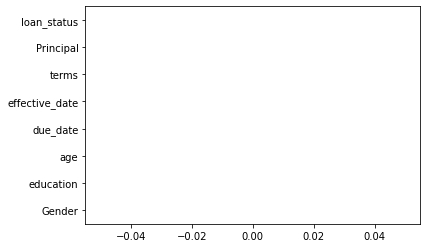

In [2828]:
sns.barplot(x=loan_df.isna().sum(), y=loan_df.columns)

Next, we plot a Seaborn heatmap to visualize the correlation between the columns with quantitative values.

<AxesSubplot:>

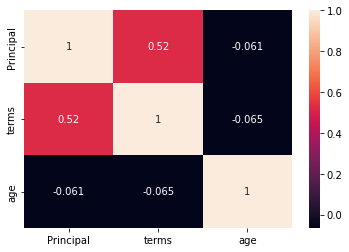

In [2829]:
sns.heatmap(loan_df.corr(), annot=True)

Next we lowercase the values and columns where it applies to have a consistent set of data. Then we proceed to hot encode the categorical columns in the dataset. Since gender has no more than two categories we can drop one of the columns

In [2830]:
loan_df.columns = loan_df.columns.str.lower()

for col in loan_df.columns:
    if loan_df[col].dtype == 'object':
        loan_df[col] = loan_df[col].str.lower()

loan_df.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,paidoff,1000,30,9/8/2016,10/7/2016,45,high school or below,male
1,paidoff,1000,30,9/8/2016,10/7/2016,33,bechalor,female
2,paidoff,1000,15,9/8/2016,9/22/2016,27,college,male
3,paidoff,1000,30,9/9/2016,10/8/2016,28,college,female
4,paidoff,1000,30,9/9/2016,10/8/2016,29,college,male


In [2831]:
encoder = preprocessing.OneHotEncoder()
encode_df = pd.DataFrame(
    data=encoder.fit_transform(
        loan_df[['loan_status','education','gender']]).toarray(),
        columns=encoder.get_feature_names(['loan_status','education','gender']))
        
loan_df = loan_df.join(encode_df)

loan_df.drop(['loan_status','education','gender','gender_female','loan_status_collection'], axis=1, inplace=True)

loan_df.head()

,principal,terms,effective_date,due_date,age,loan_status_paidoff,education_bechalor,education_college,education_high school or below,education_master or above,gender_male
0,1000,30,9/8/2016,10/7/2016,45,1.0,0.0,0.0,1.0,0.0,1.0
1,1000,30,9/8/2016,10/7/2016,33,1.0,1.0,0.0,0.0,0.0,0.0
2,1000,15,9/8/2016,9/22/2016,27,1.0,0.0,1.0,0.0,0.0,1.0
3,1000,30,9/9/2016,10/8/2016,28,1.0,0.0,1.0,0.0,0.0,0.0
4,1000,30,9/9/2016,10/8/2016,29,1.0,0.0,1.0,0.0,0.0,1.0


Now we convert all date columns to a datetime object

In [2832]:
loan_df['due_date'] = pd.to_datetime(loan_df['due_date'])
loan_df['effective_date'] = pd.to_datetime(loan_df['effective_date'])
loan_df.head()

,principal,terms,effective_date,due_date,age,loan_status_paidoff,education_bechalor,education_college,education_high school or below,education_master or above,gender_male
0,1000,30,2016-09-08,2016-10-07,45,1.0,0.0,0.0,1.0,0.0,1.0
1,1000,30,2016-09-08,2016-10-07,33,1.0,1.0,0.0,0.0,0.0,0.0
2,1000,15,2016-09-08,2016-09-22,27,1.0,0.0,1.0,0.0,0.0,1.0
3,1000,30,2016-09-09,2016-10-08,28,1.0,0.0,1.0,0.0,0.0,0.0
4,1000,30,2016-09-09,2016-10-08,29,1.0,0.0,1.0,0.0,0.0,1.0


### K Nearest Neighbors approach

##### Separation

In [2833]:
X_train = loan_df[['principal','terms','age','education_bechalor','education_college','education_high school or below','education_master or above','gender_male']]
y_train = loan_df['loan_status_paidoff']


##### Feature normalization

In [2834]:
X_train = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

##### Onehot encoding the test data and formatting the column and data

We repeat the same process with the test dataset

In [2835]:

test_df.columns = test_df.columns.str.lower()

for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df[col] = test_df[col].str.lower()

encode_df = pd.DataFrame(
    data=encoder.fit_transform(
        test_df[['loan_status','education','gender']]).toarray(),
        columns=encoder.get_feature_names(['loan_status','education','gender']))
        
test_df = test_df.join(encode_df)

test_df.drop(['unnamed: 0','unnamed: 0.1','loan_status','education','gender','gender_female','loan_status_collection'], axis=1, inplace=True)

test_df.head()

,principal,terms,effective_date,due_date,age,loan_status_paidoff,education_bechalor,education_college,education_high school or below,education_master or above,gender_male
0,1000,30,9/8/2016,10/7/2016,50,1.0,1.0,0.0,0.0,0.0,0.0
1,300,7,9/9/2016,9/15/2016,35,1.0,0.0,0.0,0.0,1.0,1.0
2,1000,30,9/10/2016,10/9/2016,43,1.0,0.0,0.0,1.0,0.0,0.0
3,1000,30,9/10/2016,10/9/2016,26,1.0,0.0,1.0,0.0,0.0,1.0
4,800,15,9/11/2016,9/25/2016,29,1.0,1.0,0.0,0.0,0.0,1.0


##### Fitting the training data into the model

Text(0.5, 1.0, 'Accuracy of KNN')

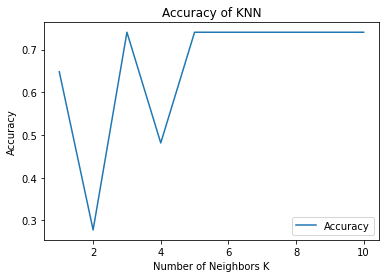

In [2836]:
K = 10
acc_df = pd.DataFrame(columns=['Accuracy'])

for k in range(1,K + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    X_test = test_df[['principal','terms','age','education_bechalor','education_college','education_high school or below','education_master or above','gender_male']]
    y_test = test_df['loan_status_paidoff']
    predict = knn.predict(X_test)
    acc_df.loc[k,['Accuracy']] = metrics.accuracy_score(y_test,predict)

fig = sns.lineplot(data=acc_df)
fig.set(xlabel ='Number of Neighbors K', ylabel = 'Accuracy')
fig.set_title('Accuracy of KNN')

### Model evaluations

In [2837]:
accuracy_report = pd.DataFrame(columns=['KNN','Logistic regression','SVM','Decision tree'],index=['Jaccard','F1-score','Log loss'])

accuracy_report.loc['Jaccard', 'KNN'] = metrics.jaccard_score(y_test,predict)
accuracy_report.loc['F1-score', 'KNN'] = metrics.f1_score(y_test,predict, average="weighted")

### Decision tree approach

In [2838]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predict = dtree.predict(X_test)

accuracy_report.loc['F1-score', 'Decision tree'] = metrics.f1_score(y_test,predict)
accuracy_report.loc['Jaccard', 'Decision tree'] = metrics.jaccard_score(y_test,predict)

### Support Vector Machine approach

In [2839]:
svm_classifier = svm.SVC(kernel='rbf')
svm_classifier.fit(X_train,y_train)
predict = svm_classifier.predict(X_test)

accuracy_report.loc['Jaccard', 'SVM'] = metrics.jaccard_score(y_test,predict)
accuracy_report.loc['F1-score', 'SVM'] = metrics.f1_score(y_test,predict, average="weighted")

In [2840]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
predict = log_reg.predict(X_test)

accuracy_report.loc['Log loss', 'Logistic regression'] = metrics.log_loss(y_test,predict)
accuracy_report.loc['F1-score', 'Logistic regression'] = metrics.f1_score(y_test,predict, average="weighted")
accuracy_report.loc['Jaccard', 'Logistic regression'] = metrics.jaccard_score(y_test,predict)

#### Final Accuracy report

In [2841]:
accuracy_report

,KNN,Logistic regression,SVM,Decision tree
Jaccard,0.740741,0,0.740741,0.740741
F1-score,0.630418,0.106754,0.630418,0.851064
Log loss,NaN,25.5843,NaN,NaN
